## 决策树

决策树是一种特殊的树形结构，一般由节点和有向边组成。其中，节点表示特征、属性或者一个类，而有向边包含判断条件。决策树从根节点开始延伸，经过不同的判断条件后，到达不同的子节点。而上层子节点又可以作为父节点被进一步划分为下层子节点。一般情况下，我们从根节点输入数据，经过多次判断后，这些数据就会被分为不同的类别。这就构成了一颗简单的分类决策树。

### 决策树算法原理

1. 数据准备 → 通过数据清洗和数据处理，将数据整理为没有缺省值的向量。
2. 寻找最佳特征 → 遍历每个特征的每一种划分方式，找到最好的划分特征。
3. 生成分支 → 划分成两个或多个节点。
4. 生成决策树 → 对分裂后的节点分别继续执行 2-3 步，直到每个节点只有一种类别。
5. 决策分类 → 根据训练决策树模型，将预测数据进行分类。

### 信息增益（ID3）

- 息熵是度量样本纯度最常用的一种指标，其公式为：
$$ \operatorname{Ent}(\operatorname{D})=-\sum_{k=1}^{\left |y \right |}p_{k}\; log_{2}p_{k} \tag{1}$$
- 其中 D表示样本集合，pk表示第k类样本所占的比例

In [6]:
import numpy as np
import pandas as pd
import math


def create_data():
    # 生成示例数据
    data_value = np.array(
        [
            ["long", "thick", 175, "no", "man"],
            ["short", "medium", 168, "no", "man"],
            ["short", "thin", 178, "yes", "man"],
            ["short", "thick", 172, "no", "man"],
            ["long", "medium", 163, "no", "man"],
            ["short", "thick", 180, "no", "man"],
            ["long", "thick", 173, "yes", "man"],
            ["short", "thin", 174, "no", "man"],
            ["long", "thin", 164, "yes", "woman"],
            ["long", "medium", 158, "yes", "woman"],
            ["long", "thick", 161, "yes", "woman"],
            ["short", "thin", 166, "yes", "woman"],
            ["long", "thin", 158, "no", "woman"],
            ["short", "medium", 163, "no", "woman"],
            ["long", "thick", 161, "yes", "woman"],
            ["long", "thin", 164, "no", "woman"],
            ["short", "medium", 172, "yes", "woman"],
        ]
    )
    columns = np.array(["hair", "voice", "height", "ear_stud", "labels"])
    data = pd.DataFrame(data_value.reshape(17, 5), columns=columns)
    return data


def get_Ent(data):
    """
    参数:
    data -- 数据集

    返回:
    Ent -- 信息熵
    """
    # 计算信息熵
    num_sample = len(data)  # 样本个数
    label_counts = {}  # 初始化标签统计字典
    for i in range(num_sample):
        each_data = data.iloc[i, :]
        current_label = each_data["labels"]  # 得到当前元素的标签（label）

        # 如果标签不在当前字典中，添加该类标签并初始化 value=0,否则该类标签 value+1
        if current_label not in label_counts.keys():
            label_counts[current_label] = 0
        label_counts[current_label] += 1

    Ent = 0.0  # 初始化信息熵
    for key in label_counts:
        prob = float(label_counts[key]) / num_sample
        Ent -= prob * math.log(prob, 2)  # 应用信息熵公式计算信息熵
    return Ent

def get_gain(data, base_ent, feature):
    """
    参数:
    data -- 数据集
    base_ent -- 根节点的信息熵
    feature -- 计算信息增益的特征

    返回:
    Ent -- 信息熵
    """
    # 计算信息增益
    feature_list = data[feature]  # 得到一个特征的全部取值
    unique_value = set(feature_list)  # 特征取值的类别
    feature_ent = 0.0

    for each_feature in unique_value:
        temp_data = data[data[feature] == each_feature]
        weight = len(temp_data) / len(feature_list)  # 计算该特征的权重值
        temp_ent = weight * get_Ent(temp_data)
        feature_ent = feature_ent + temp_ent

    gain = base_ent - feature_ent  # 信息增益
    return gain


def get_splitpoint(data, base_ent, feature):
    """
    参数:
    data -- 数据集
    base_ent -- 根节点的信息熵
    feature -- 需要划分的连续特征

    返回:
    final_t -- 连续值最优划分点
    """
    # 将连续值进行排序并转化为浮点类型
    continues_value = data[feature].sort_values().astype(np.float64)
    continues_value = [i for i in continues_value]  # 不保留原来的索引
    t_set = []
    t_ent = {}

    # 得到划分点 t 的集合
    for i in range(len(continues_value) - 1):
        temp_t = (continues_value[i] + continues_value[i + 1]) / 2
        t_set.append(temp_t)

    # 计算最优划分点
    for each_t in t_set:
        # 将大于划分点的分为一类
        temp1_data = data[data[feature].astype(np.float64) > each_t]
        # 将小于划分点的分为一类
        temp2_data = data[data[feature].astype(np.float64) < each_t]
        weight1 = len(temp1_data) / len(data)
        weight2 = len(temp2_data) / len(data)
        # 计算每个划分点的信息增益
        temp_ent = (
            base_ent - weight1 * get_Ent(temp1_data) - weight2 * get_Ent(temp2_data)
        )
        t_ent[each_t] = temp_ent
    print("t_ent:", t_ent)
    final_t = max(t_ent, key=t_ent.get)
    return final_t

data = create_data()
base_ent = get_Ent(data)

get_gain(data, base_ent, "hair")

final_t = get_splitpoint(data, base_ent, "height")

def choice_1(x, t):
    if x > t:
        return ">{}".format(t)
    else:
        return "<{}".format(t)


deal_data = data.copy()
# 使用lambda和map函数将 height 按照final_t划分为两个类别
deal_data["height"] = pd.Series(
    map(lambda x: choice_1(int(x), final_t), deal_data["height"])
)
deal_data

t_ent: {158.0: 0.1179805181500242, 159.5: 0.1179805181500242, 161.0: 0.2624392604045631, 162.0: 0.2624392604045631, 163.0: 0.3856047022157598, 163.5: 0.15618502398692893, 164.0: 0.3635040117533678, 165.0: 0.33712865788827096, 167.0: 0.4752766311586692, 170.0: 0.32920899348970845, 172.0: 0.5728389611412551, 172.5: 0.4248356349861979, 173.5: 0.3165383509071513, 174.5: 0.22314940393447813, 176.5: 0.14078143361499595, 179.0: 0.06696192680347068}


,hair,voice,height,ear_stud,labels
0,long,thick,>172.0,no,man
1,short,medium,<172.0,no,man
2,short,thin,>172.0,yes,man
3,short,thick,<172.0,no,man
4,long,medium,<172.0,no,man
5,short,thick,>172.0,no,man
6,long,thick,>172.0,yes,man
7,short,thin,>172.0,no,man
8,long,thin,<172.0,yes,woman
9,long,medium,<172.0,yes,woman


模型准确率: 1.00


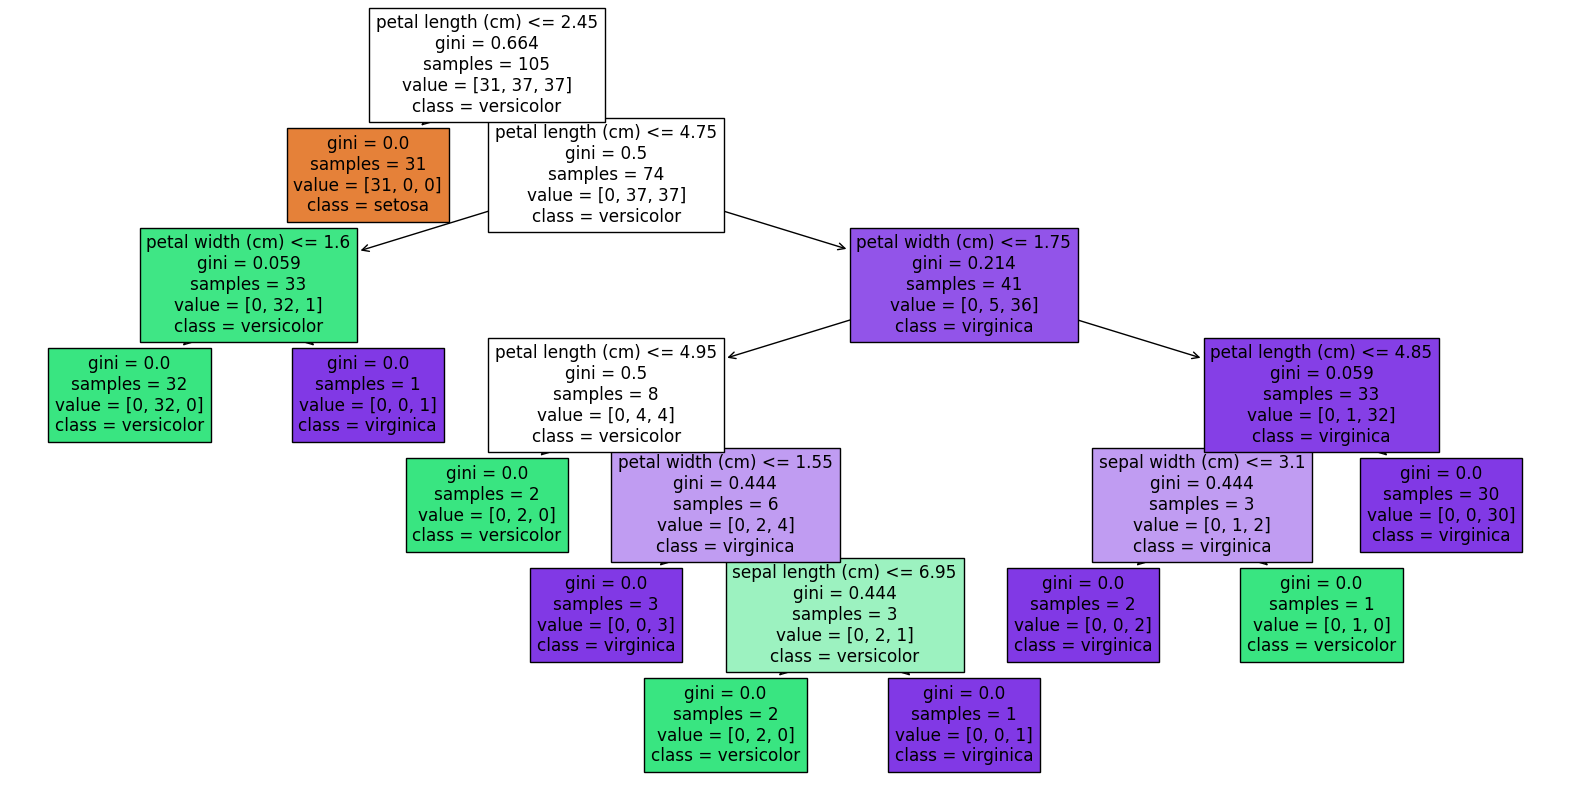

In [1]:
# 决策树教程

# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# 加载数据集
# 这里我们使用鸢尾花数据集作为示例
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树分类器
clf = DecisionTreeClassifier()

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.2f}")

# 可视化决策树
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()